<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [43]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [45]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [46]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [47]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [48]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [49]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [50]:
#1.1
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


Viendo los valores de los pixeles (columnas c00 a c63) los cuales van de 0 a 16, se ve que las medias y desviaciones estandar varían entre cada una de las columnas, por lo tanto no todos los pixeles tienen la misma intensidad en promedio.

In [51]:
#1.2 y 1.3
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non-null   int64
 23  c23     1797 

Para 1.2, se está usando "912,7 KB" de memoria.

Para 1.3, los tipos de datos en las columnas son de tipo "int64"

In [52]:
#1.4
digits["target"].value_counts()

,count
target,
3,183
1,182
5,182
4,181
6,181
9,180
7,179
0,178
2,177


Para 1.4, las clases están distribuidas en el output de arriba, y la distribución de estas clases se encuentran dentro de un rango de 183 a 174

Finalmente para 1.5, por los resultados anteriores, los valores de los píxeles están dentro del rango esperado (0-16), no hay valores nulos (Non-Null Count es 1797 para todas las columnas), y los tipos de datos son consistentes con datos numéricos enteros. Por lo que no parece haber registros que no correspondan al conocimiento previo.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [53]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

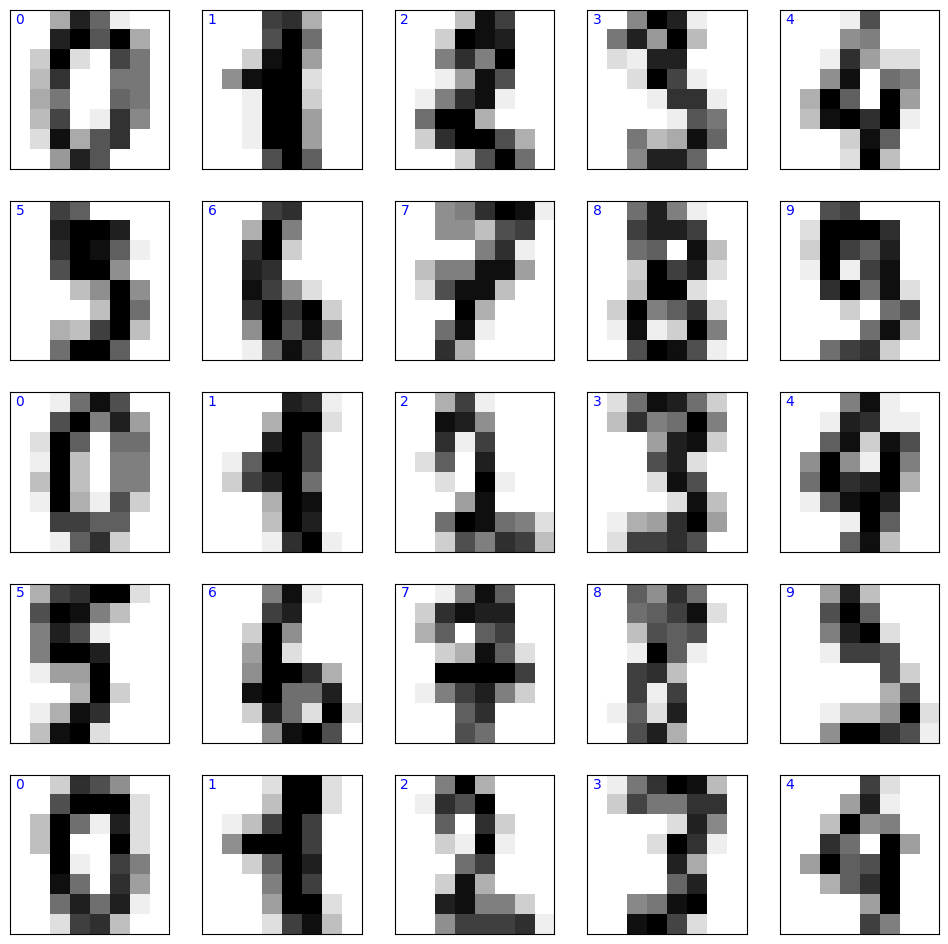

In [54]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i in range(nx * ny):
    row = i // ny
    col = i % ny
    axs[row, col].imshow(digits_dict["images"][i], cmap='gray_r')
    axs[row, col].text(0, 0, str(digits_dict["target"][i]), horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
    axs[row, col].get_xaxis().set_visible(False)
    axs[row, col].get_yaxis().set_visible(False)

plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [55]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (1437, 64)
Tamaño del conjunto de prueba (X_test): (360, 64)
Tamaño del conjunto de entrenamiento (y_train): (1437,)
Tamaño del conjunto de prueba (y_test): (360,)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Regresión Logística
log_reg_model = LogisticRegression(max_iter=10000)
print("Modelo de Regresión Logística instanciado.")

#K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
print("Modelo K-Nearest Neighbors instanciado.")

#Support Vector Machine (SVC)
svc_model = SVC(gamma='auto')
print("Modelo Support Vector Machine (SVC) instanciado.")

Modelo de Regresión Logística instanciado.
Modelo K-Nearest Neighbors instanciado.
Modelo Support Vector Machine (SVC) instanciado.


--- Evaluando Regresión Logística ---
Tiempo de ajuste: 0.9826 segundos
Accuracy: 0.9750
Precision: 0.9767
Recall: 0.9765
F1-score: 0.9765


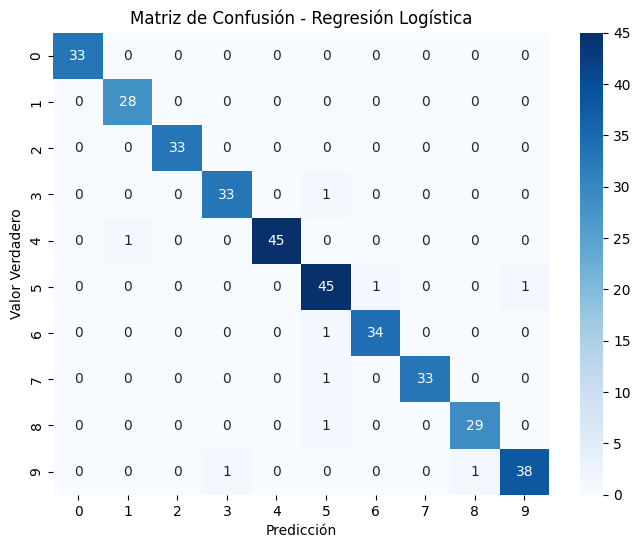


--- Evaluando K-Nearest Neighbors ---
Tiempo de ajuste: 0.0018 segundos
Accuracy: 0.9861
Precision: 0.9879
Recall: 0.9878
F1-score: 0.9878


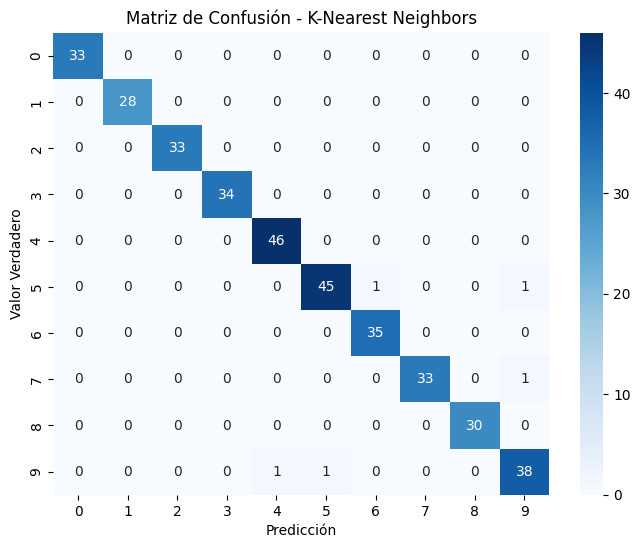


--- Evaluando Support Vector Machine (SVC) ---
Tiempo de ajuste: 0.2533 segundos
Accuracy: 0.4667
Precision: 0.9150
Recall: 0.4963
F1-score: 0.5478


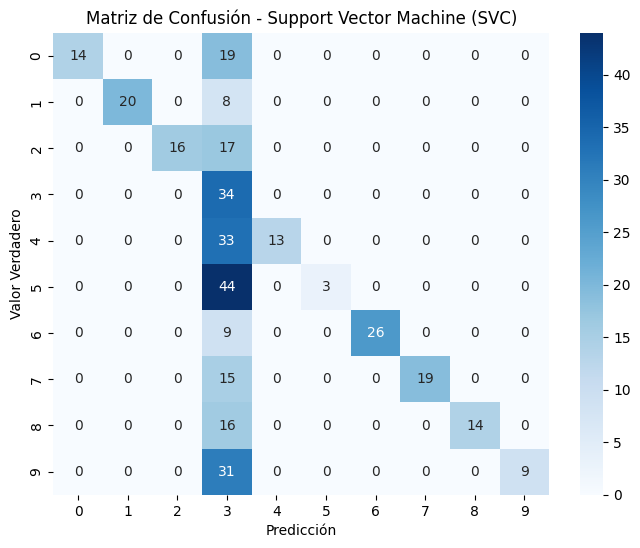

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Evaluando Regresión Logística ---")

start_time_lr = time.time()
log_reg_model.fit(X_train, y_train)
end_time_lr = time.time()
fit_time_lr = end_time_lr - start_time_lr
print(f"Tiempo de ajuste: {fit_time_lr:.4f} segundos")

y_pred_lr = log_reg_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.show()

print("\n--- Evaluando K-Nearest Neighbors ---")

start_time_knn = time.time()
knn_model.fit(X_train, y_train)
end_time_knn = time.time()
fit_time_knn = end_time_knn - start_time_knn
print(f"Tiempo de ajuste: {fit_time_knn:.4f} segundos")

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-score: {f1_knn:.4f}")

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - K-Nearest Neighbors')
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.show()



print("\n--- Evaluando Support Vector Machine (SVC) ---")

start_time_svc = time.time()
svc_model.fit(X_train, y_train)
end_time_svc = time.time()
fit_time_svc = end_time_svc - start_time_svc
print(f"Tiempo de ajuste: {fit_time_svc:.4f} segundos")

y_pred_svc = svc_model.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='macro')
recall_svc = recall_score(y_test, y_pred_svc, average='macro')
f1_svc = f1_score(y_test, y_pred_svc, average='macro')

print(f"Accuracy: {accuracy_svc:.4f}")
print(f"Precision: {precision_svc:.4f}")
print(f"Recall: {recall_svc:.4f}")
print(f"F1-score: {f1_svc:.4f}")

conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Support Vector Machine (SVC)')
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.show()

###Respuestas:
-El modelo mejor basado en las metricas de Accuracy, Precision, Recall, F1-score, el modelo K-Nearest Neighbors (KNN) es el mejor, ya que tiene las metricas más altas en todas las categorias.

-El que se demora menos tiempo en ejecutarse, es nuevamente K-Nearest Neighbors (KNN), ya que su tiempo de ajuste es muy bajo.

-Basado en todo lo anterior, el modelo que se escoge es K-Nearest Neighbors (KNN).

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

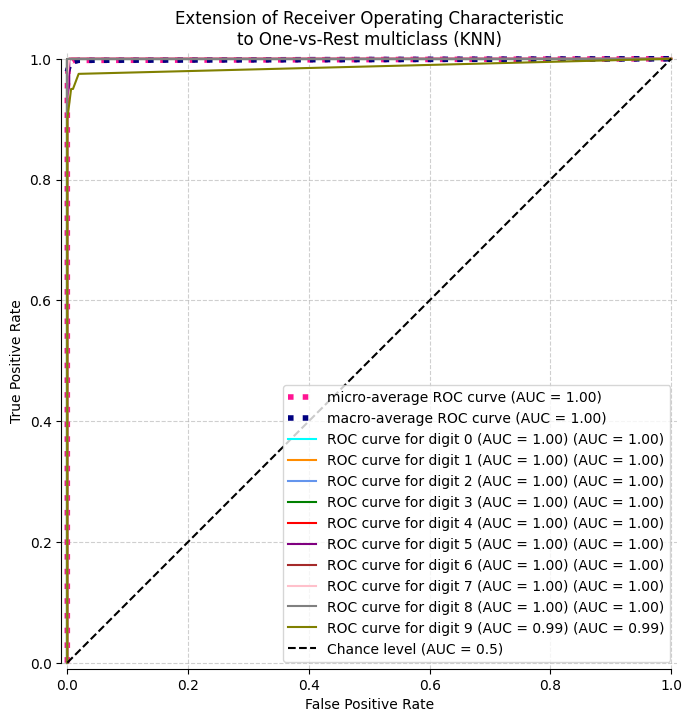

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle


enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_onehot_test = enc.fit_transform(y_test.reshape(-1, 1))

if hasattr(knn_model, "predict_proba"):
    y_score_knn = knn_model.predict_proba(X_test)
else:
    raise AttributeError("El modelo KNN no tiene el método predict_proba necesario para la curva ROC.")


n_classes = y_onehot_test.shape[1]
target_names = [str(i) for i in range(n_classes)]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score_knn.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


fig, ax = plt.subplots(figsize=(8, 8))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "green", "red", "purple", "brown", "pink", "gray", "olive"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score_knn[:, class_id],
        name=f"ROC curve for digit {target_names[class_id]} (AUC = {roc_auc[class_id]:.2f})",
        ax=ax,

        despine=True,
        color=color
    )

ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass (KNN)",
)
ax.legend(loc="lower right")
plt.grid(linestyle='--', alpha=0.6)
plt.show()

Conclusión del grafico:

El modelo KNN tiene un rendimiento casi perfecto, con valores de AUC cercanos a 1.00 para todas las clases (excepto en una), lo que indica una excelente capacidad de clasificación, eso si, resultados tan altos podrían sugerir sobreajuste.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [60]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

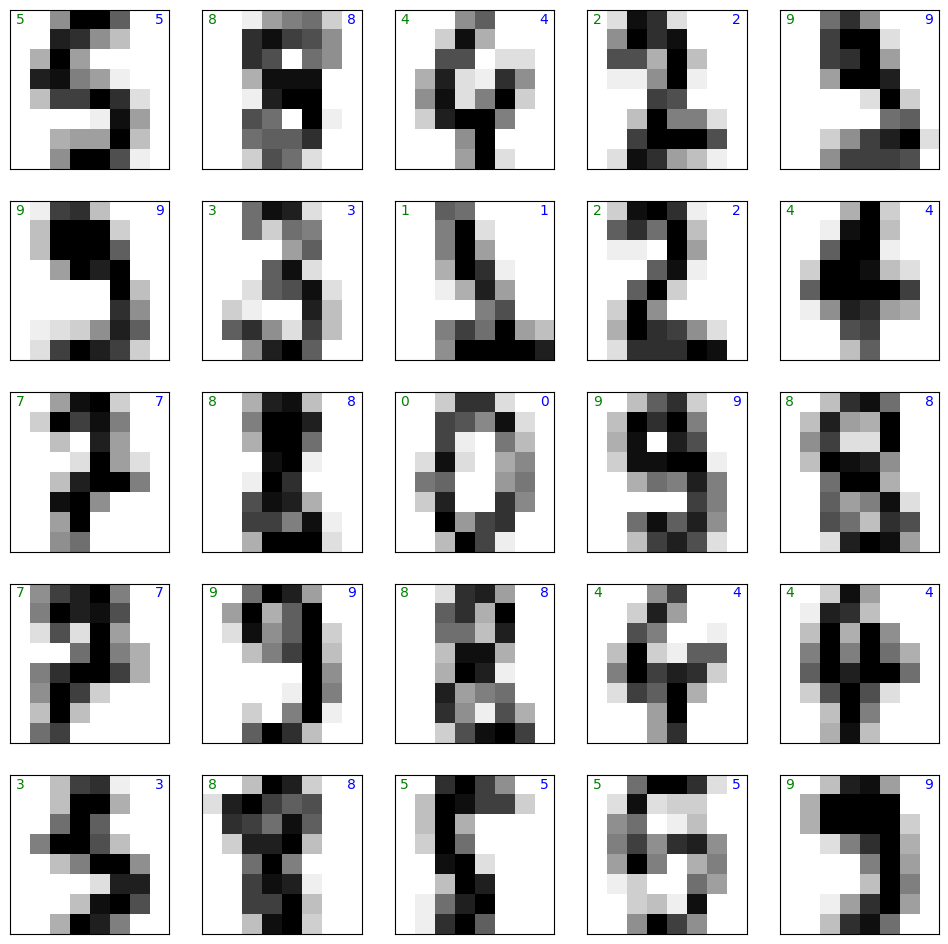

In [61]:
#valor predicho y original son iguales
mostrar_resultados(digits, knn_model, label="correctos")

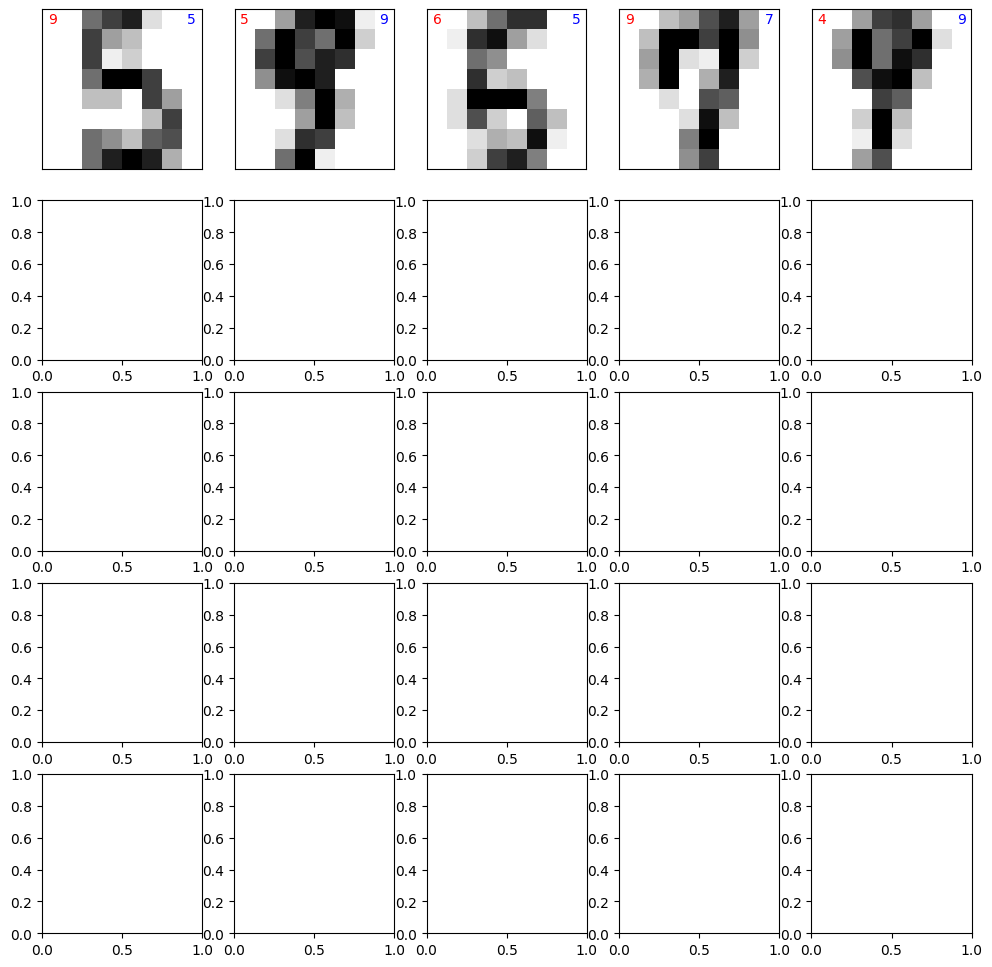

In [62]:
#valor predicho y original distintos
mostrar_resultados(digits, knn_model, label="incorrectos")

Las fallas ocurren porque las personas escriben los dígitos de formas muy distintas: algunos con trazos más finos o gruesos, inclinados o redondeados, lo que puede hacer que un número se parezca a otro. Además, la baja resolución de las imágenes limita los detalles y puede generar confusión en el modelo. A veces los trazos están incompletos o conectados de forma inusual, lo que dificulta su correcta identificación.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Respuesta:

Se analizó el dataset de dígitos manuscritos (imágenes 8x8 con valores entre 0 y 16, 1797 registros). La distribución de clases fue uniforme y las imágenes, aunque pixeladas, permitieron reconocer los dígitos.

Se compararon tres modelos: Regresión Logística, KNN y SVC.
El KNN obtuvo el mejor desempeño (Accuracy, Precision, Recall y F1 ≈ 0.99) y fue el más rápido en entrenar (-0.002 s).
La Regresión Logística también funcionó bien (-0.97), mientras que el SVC rindió peor.

La curva AUC-ROC del KNN mostró un rendimiento casi perfecto (AUC ≈ 1.00 en la mayoría de las clases, 0.99 para el dígito 9).

Las predicciones erróneas se debieron a dígitos mal escritos o similares visualmente, lo que generó confusión por la baja resolución.

Una dificultad técnica fue ajustar correctamente el parámetro "curve_kwargs" en la función "RocCurveDisplay.from_predictions".

Como trabajo futuro, se podrían afinar hiperparámetros del KNN o probar otros modelos más complejos.